# Lab Network Analysis

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nxviz import CircosPlot
from nxviz import MatrixPlot
from nxviz import ArcPlot
import community

#### Crear Grafo

In [2]:
#Crear el Grafo
G = nx.Graph()

In [3]:
# Añadir nodes (nodos) y edges (conexiones) al grafo
G.add_node(1)
G.add_nodes_from([2, 3])

G.add_edge(1, 2)
G.add_edges_from([(1, 2), (1, 3)])

### Analyzing Networks

#### Tamaño grafo

In [4]:
#Ver el tamaño del grafo
#Número de nodos en el grafo
G.order()
print(G.number_of_nodes())

#Número de edges en el grafo
G.size()
print(G.number_of_edges())

3
2


In [5]:
# Return: array con el node y el número de edges del nodo
print(G.degree())

# Return: diccionario con el node y el número de edges del nodo
dict(G.degree())

[(1, 2), (2, 1), (3, 1)]


{1: 2, 2: 1, 3: 1}

#### Average degree
Grado promedio del grafo: indica el número de nodos promedio al que se puede llegar desde un nodo en el grafo

In [6]:
sum(dict(G.degree()).values())/G.order()

1.3333333333333333

#### Density of the graph
Porcentaje del grafo que puede alcanzar el nodo promedio. 

In [7]:
# Average degree (grado promedio)/ nº de nodos en el gráfico
nx.density(G)

0.6666666666666666

#### Diameter and  average distance
Solo se aplica cuando el grafo esta completamente conectado o donde todos los nodos pueden alcanzar a los demás nodos. <br>
- Diámetro: indica cuál es la ruta más larga en el grafo o el número máximo de nodos que hay entre dos nodos. 
- Distancia promedio: es el numero medio de nodos que se encontrará entre dos nodos. 

In [8]:
#Diámetro
print(nx.diameter(G))

#Distancia promedio
nx.average_shortest_path_length(G)

2


1.3333333333333333

### Node Centrality Metrics
Las métricas de centralidad de nodos nos dicen que nodos son los más importantes. <br>
 - Betweenness (centralidad de la interrelación): que nodos son vías de información 
 - Closeness (centralidad de la proximidad): mide el alcance del nodo, la rápidez con la que la informaciónd se propangadaría desde ese nodo. 
 - Eigenvector(centralidad del vector propio): mide la influencia relacionada o quién está más cerca de los nodos más importantes de la red.
 - Degree (centralidad del grado): medida de popularidad basada en el grado del nodo.  
 - Pagerank (rango de página): usa las conexiones de otros nodos importantes como medida de importancia. 

In [9]:
betweenness = nx.betweenness_centrality(G, weight='edge')
print(betweenness)
closeness = nx.closeness_centrality(G, distance='edge')
print(closeness)
eigenvector = nx.eigenvector_centrality_numpy(G)
print(eigenvector)
degree = nx.degree_centrality(G)
print(degree)
pagerank = nx.pagerank(G)
print(pagerank)

{1: 1.0, 2: 0.0, 3: 0.0}
{1: 1.0, 2: 0.6666666666666666, 3: 0.6666666666666666}
{1: 0.7071067811865476, 2: 0.4999999999999999, 3: 0.4999999999999999}
{1: 1.0, 2: 0.5, 3: 0.5}
{1: 0.48648582432442095, 2: 0.25675708783778944, 3: 0.25675708783778944}


## Building and Analyzing Graphs from Tabular Data
Un dataset en formato tabular contiene filas que representan las entidades y transacciones o iteracciones y las columnas que representan atributos o características de las filas. Tenemos:
- Entidades
- Transacciones o iteraciones
- Relaciones

### Gymnastics

In [10]:
gymnastics = pd.read_csv('data/us_womens_gymnastics.csv')
print(gymnastics.info())
display(gymnastics.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2866 entries, 0 to 2865
Data columns (total 4 columns):
Name_x    2866 non-null object
Name_y    2866 non-null object
Games     2866 non-null object
Event     2866 non-null object
dtypes: object(4)
memory usage: 89.6+ KB
None


,Name_x,Name_y,Games,Event
0,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Marian Emma Barone (Twining-),1948 Summer,Gymnastics Women's Team All-Around
1,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)","Consetta Anne ""Connie"" Caruccio-Lenz",1948 Summer,Gymnastics Women's Team All-Around
2,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Dorothy Katherine Dalton,1948 Summer,Gymnastics Women's Team All-Around
3,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Meta Elste (Neumann-),1948 Summer,Gymnastics Women's Team All-Around
4,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Helen Mary Schifano (-Sjursen),1948 Summer,Gymnastics Women's Team All-Around


In [11]:
#G = nx.from_pandas_edgelist(df, source, target)
G = nx.from_pandas_edgelist(gymnastics, 'Name_x', 'Name_y')

In [12]:
#How many gymnasts (nodes) are in the graph?
G.order()

94

In [13]:
#How many edges are in the graph?
G.size()

292

In [14]:
#What is the average degree?
sum(dict(G.degree()).values())/G.order()

6.212765957446808

In [15]:
#What is the density of the graph?
nx.density(G)

0.06680393502630977

In [16]:
#Is this graph fully-connected? How do you know?
print(nx.is_connected(G))

False


In [17]:
betweenness = nx.betweenness_centrality(G, weight='edge')

In [18]:
# Definimos una función para que nos devuelva un diccionario convertido a lista y ordenado por los valores más altos.
def lis_dict(x):
    return list(reversed(sorted((value, node)for (node, value) in x.items())))

In [19]:
# What gymnast has the highest betweenness centrality?
# Linda Joan Metheny (-Mulvihill)
lis_dict(betweenness)[:6]

[(0.05002337540906966, 'Linda Joan Metheny (-Mulvihill)'),
 (0.04184198223468911, 'Muriel Evelyn Davis-Grossfeld'),
 (0.026881720430107527, 'Kimberly Ann Chace (-Boyle, -May)'),
 (0.017999064983637215, 'Consetta Anne "Connie" Caruccio-Lenz'),
 (0.006077606358111267, 'Dominique Margaux Dawes (-Thompson)'),
 (0.004207573632538569, 'Cathleen Roxanne "Cathy" Rigby (-Mason, -McCoy)')]

In [20]:
eigenvector = nx.eigenvector_centrality_numpy(G)

In [21]:
# What gymnast has the highest Eigenvector centrality?
# Meta Elste (Neumann-) and Marian Emma Barone (Twining-)
lis_dict(eigenvector)[:6]

[(0.3306259403012174, 'Dorothy Katherine Dalton'),
 (0.33062594030121734, 'Marian Emma Barone (Twining-)'),
 (0.33062594030121717, 'Meta Elste (Neumann-)'),
 (0.33062594030121706, 'Clara Marie Schroth-Lomady'),
 (0.31799449109295946, 'Consetta Anne "Connie" Caruccio-Lenz'),
 (0.2390995516869181, 'Ladislava Aloisie "Laddie" Bakanic (Hniz-)')]

In [22]:
degree = nx.degree_centrality(G)

In [23]:
# What gymnast has the highest degree centrality?
# Muriel Evelyn Davis-Grossfeld, Linda Joan Metheny (-Mulvihill) and Consetta Anne "Connie" Caruccio-Lenz')
lis_dict(degree)[:6]

[(0.15053763440860216, 'Muriel Evelyn Davis-Grossfeld'),
 (0.15053763440860216, 'Linda Joan Metheny (-Mulvihill)'),
 (0.15053763440860216, 'Consetta Anne "Connie" Caruccio-Lenz'),
 (0.13978494623655915, 'Dominique Margaux Dawes (-Thompson)'),
 (0.11827956989247312, 'Meta Elste (Neumann-)'),
 (0.11827956989247312, 'Marian Emma Barone (Twining-)')]

### Basketball

In [24]:
basketball = pd.read_csv('data/us_mens_basketball.csv')
basketball.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


In [25]:
def df_to_graph(df, entity, edge):
    df2 = df.copy()
    graph_df = pd.merge(df, df2, how='inner', on=edge)
    graph_df = graph_df.groupby([entity + '_x', entity + '_y']).count().reset_index()
    graph_df = graph_df[graph_df[entity + '_x'] != graph_df[entity + '_y']]
    
    if type(edge) == list:
        graph_df = graph_df[[entity + '_x', entity + '_y'] + edge]
    else:
        graph_df = graph_df[[entity + '_x', entity + '_y', edge]]
    
    return graph_df

In [26]:
df_basketball = df_to_graph(basketball, entity='Name', edge= 'Games')
df_basketball.head()

,Name_x,Name_y,Games
1,Adrian Delano Dantley,"Ernest ""Ernie"" Grunfeld",1
2,Adrian Delano Dantley,"Kenneth Alan ""Kenny"" Carr",1
3,Adrian Delano Dantley,"Michel Taylor ""Tate"" Armstrong",1
4,Adrian Delano Dantley,"Mitchell William ""Mitch"" Kupchak",1
5,Adrian Delano Dantley,"Philip Jackson ""Phil"" Ford, Jr.",1


In [27]:
A = nx.from_pandas_edgelist(df=df_basketball, source='Name_x', target='Name_y', edge_attr='Games')

In [28]:
# Which players have played together in the Olympics the most number of times?


In [29]:
# How many basketball players (nodes) are in the graph?
A.order()

196

In [30]:
# How many edges are in the graph?
A.number_of_edges()

1232

In [31]:
# What is the average degree?
sum(dict(A.degree()).values())/G.order()

26.21276595744681

In [32]:
# What is the density of the graph?
print(nx.density(A))

0.06446886446886448


In [33]:
# Is this graph fully-connected? How do you know?
nx.is_connected(A)

False

In [34]:
# What player has the highest betweenness centrality?
betweenness_A = nx.betweenness_centrality(A, weight='edge')
lis_dict(betweenness_A)[:6]
# Gary Dwayne Payton

[(0.09193761564895586, 'Gary Dwayne Payton'),
 (0.09135606661379858, 'Jason Frederick Kidd'),
 (0.04742268041237115, 'Carmelo Kyan Anthony'),
 (0.03266190853819722, 'David Maurice Robinson'),
 (0.030240549828178694, 'William Marion "Bill" Hougland'),
 (0.024054982817869417, 'Robert Albert "Bob" Kurland')]

In [35]:
# What player has the highest Eigenvector centrality?
eigenvector_A = nx.eigenvector_centrality_numpy(A)
lis_dict(eigenvector_A)[:6]
# Carmelo Kyan Anthony

[(0.34185005667190715, 'Carmelo Kyan Anthony'),
 (0.288453521431589, 'LeBron Raymone James'),
 (0.22431681558531255, 'Deron Michael Williams'),
 (0.2243168155853125, 'Kobe Bean Bryant'),
 (0.22431681558531238, 'Christopher Emmanuel "Chris" Paul'),
 (0.22195694763560425, 'Carlos Austin Boozer, Jr.')]

In [36]:
# What player has the highest degree centrality?
degree_A = nx.degree_centrality(A)
lis_dict(degree_A)[:6]
#Carmelo Kyan Anthony

[(0.18461538461538463, 'Carmelo Kyan Anthony'),
 (0.14358974358974358, 'David Maurice Robinson'),
 (0.13333333333333333, 'Robert Albert "Bob" Kurland'),
 (0.13333333333333333, 'LeBron Raymone James'),
 (0.12307692307692308, 'William Marion "Bill" Hougland'),
 (0.11282051282051282, 'Jason Frederick Kidd')]

In [37]:
# What are some notable differences between this graph and the gymnastics graph you analyzed earlier?



## Visualization of Network Data

/home/miriam/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


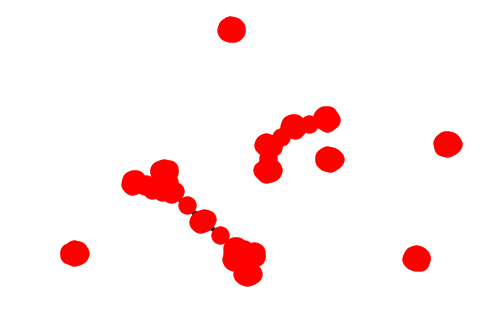

In [38]:
nx.draw(A)

/home/miriam/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


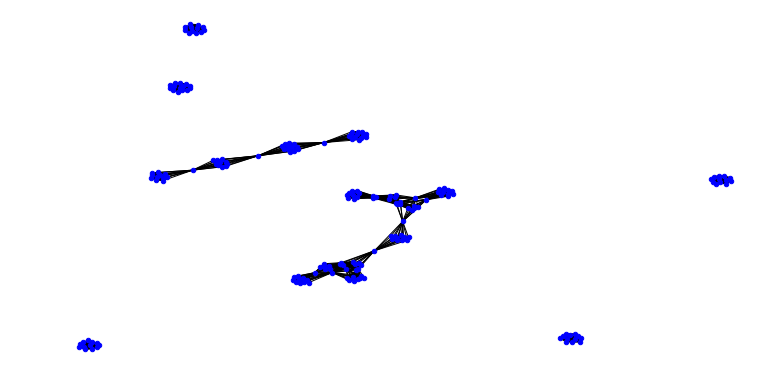

In [39]:
plt.figure(figsize=(10,5))
nx.draw(A, node_size=20, node_color='blue')

/home/miriam/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


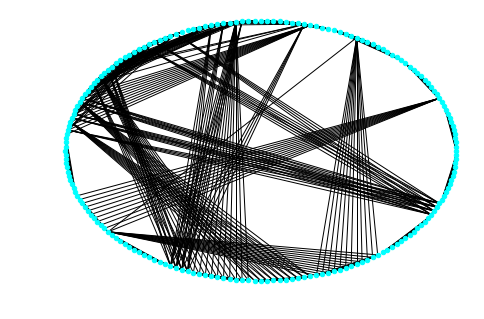

In [40]:
nx.draw_circular(A, node_size=20, node_color='cyan')

/home/miriam/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


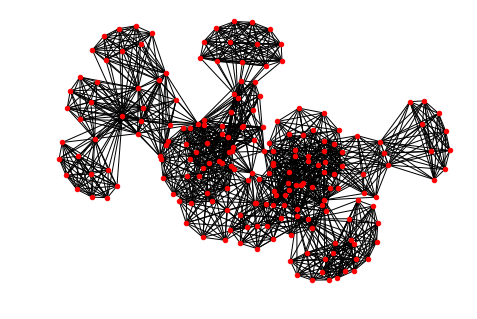

In [41]:
nx.draw_kamada_kawai(A, node_size=20, node_color='red')

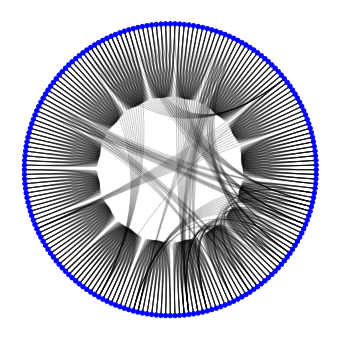

In [42]:
#Circos Plots
c = CircosPlot(A)
c.draw()

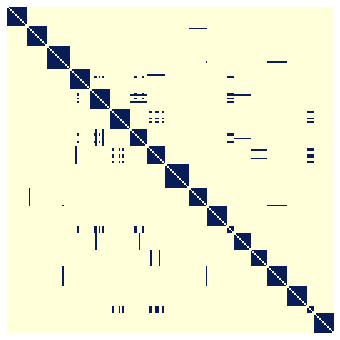

In [43]:
#Matrix Plots
m = MatrixPlot(A)
m.draw()

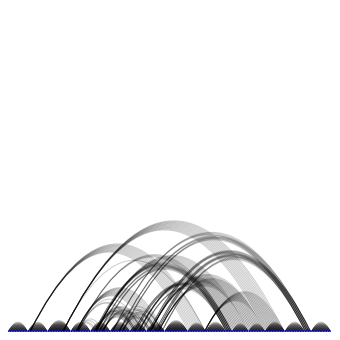

In [44]:
#Arc Plots
a = ArcPlot(A)
a.draw()

### Bar Chart

For example, you can aggregate your data by entity, count the number of connections or the total number of interactions, sort them, filter to get just the top 20, and visualize it as a horizontal bar chart. By this point in the program, you should have all the tools in your arsenal to be able to do this. Try it for the basketball data set and see who are the top 20 players in the network that have played alongside the most number of other players.

In [45]:
df_basketball.head()

,Name_x,Name_y,Games
1,Adrian Delano Dantley,"Ernest ""Ernie"" Grunfeld",1
2,Adrian Delano Dantley,"Kenneth Alan ""Kenny"" Carr",1
3,Adrian Delano Dantley,"Michel Taylor ""Tate"" Armstrong",1
4,Adrian Delano Dantley,"Mitchell William ""Mitch"" Kupchak",1
5,Adrian Delano Dantley,"Philip Jackson ""Phil"" Ford, Jr.",1


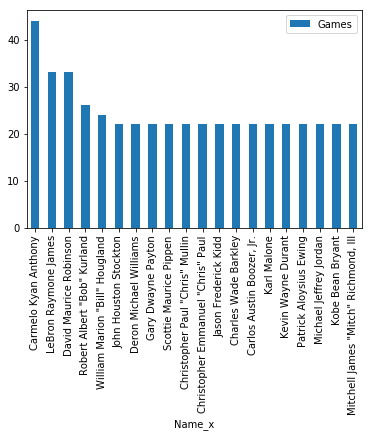

In [46]:
a = df_basketball.groupby('Name_x').agg(sum).sort_values(['Games'],ascending=False).iloc[:20]
a.plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ddafb73c8>]],
      dtype=object)

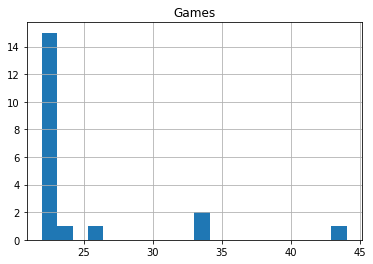

In [47]:
a.hist(bins=20)

### Scatter Plots

In [48]:
gymnastics.head()

,Name_x,Name_y,Games,Event
0,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Marian Emma Barone (Twining-),1948 Summer,Gymnastics Women's Team All-Around
1,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)","Consetta Anne ""Connie"" Caruccio-Lenz",1948 Summer,Gymnastics Women's Team All-Around
2,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Dorothy Katherine Dalton,1948 Summer,Gymnastics Women's Team All-Around
3,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Meta Elste (Neumann-),1948 Summer,Gymnastics Women's Team All-Around
4,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Helen Mary Schifano (-Sjursen),1948 Summer,Gymnastics Women's Team All-Around


In [49]:
# Number of connections vs. number of interactions
#c = gymnastics.groupby('Name_x').agg({'Games': pd.Series.nunique})
#c.plot.scatter(x="Name_x", y="Games")
# X e Y?¿?¿?

## Deeper Analysis of Networks

### Subgraphs

In [50]:
basket_subgraphs = nx.ego_graph(A, 'Carmelo Kyan Anthony', radius=1)

/home/miriam/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


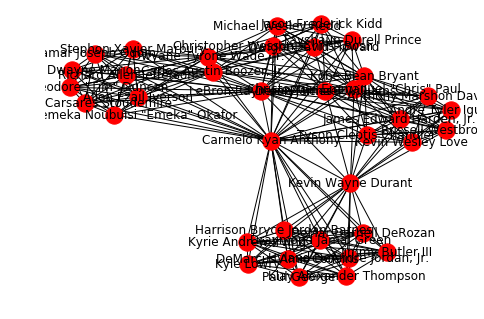

In [51]:
nx.draw(basket_subgraphs,  with_labels = True)

/home/miriam/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


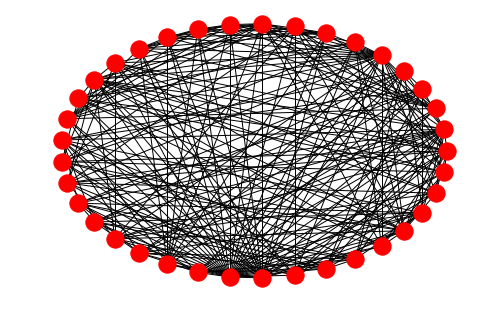

In [52]:
nx.draw_circular(basket_subgraphs, with_labels = False)

In [53]:
gym_subgraphs = nx.ego_graph(G, 'Linda Joan Metheny (-Mulvihill)', radius=1)

/home/miriam/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


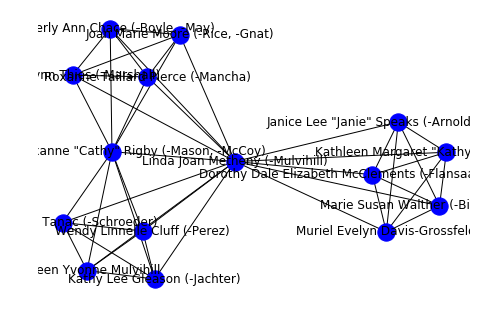

In [54]:
nx.draw(gym_subgraphs,  with_labels = True, node_color='blue')

/home/miriam/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


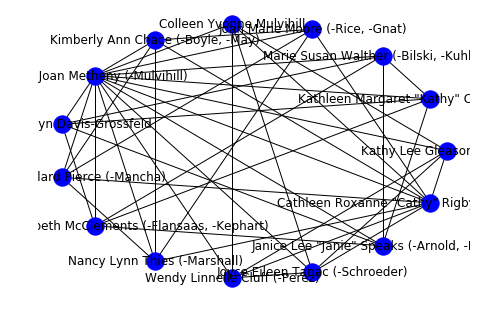

In [55]:
nx.draw_circular(gym_subgraphs,  with_labels = True, node_color='blue')

### Community Detection

In [56]:
parts = community.best_partition(A)

/home/miriam/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


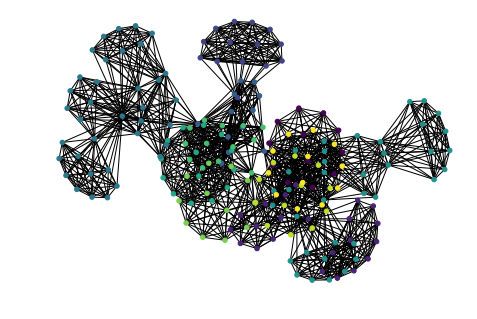

In [57]:
values = list(parts.values())
nx.draw_kamada_kawai(A, node_size=20, node_color=values)

### Hierarchical Graphs

In [58]:
df_basketball_2 = df_to_graph(basketball, entity='Games', edge= 'Name')
df_basketball_2.head()

,Games_x,Games_y,Name
2,1948 Summer,1952 Summer,1
3,1952 Summer,1948 Summer,1
5,1952 Summer,1956 Summer,1
6,1956 Summer,1952 Summer,1
8,1956 Summer,1960 Summer,1


In [59]:
A2 = nx.from_pandas_edgelist(df=df_basketball_2, source='Games_x', target='Games_y', edge_attr='Name')

/home/miriam/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


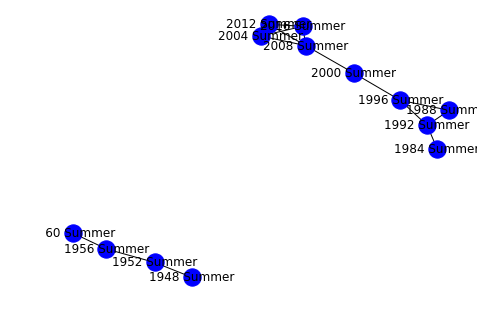

In [60]:
nx.draw(A2, with_labels = True, node_color='blue')

Are there any years connected that you weren't expecting?
- 1988 1996 <br>
Are there any years you were expecting to be connected that are not?
- 2000 y 2004 <br>
Dig into the underlying data and see if you can find out which players are driving the connection between years.

### Bonus: More Complex Networks 

In [63]:
df_basketball_3 = df_to_graph(basketball, entity='Games', edge= 'Name')
df_basketball_3.head()

,Games_x,Games_y,Name
2,1948 Summer,1952 Summer,1
3,1952 Summer,1948 Summer,1
5,1952 Summer,1956 Summer,1
6,1956 Summer,1952 Summer,1
8,1956 Summer,1960 Summer,1


In [65]:
D = nx.from_pandas_edgelist(df=df_basketball_3, source='Games_x', target='Games_y', edge_attr='Name')

In [66]:
F = nx.compose(A,D)

/home/miriam/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


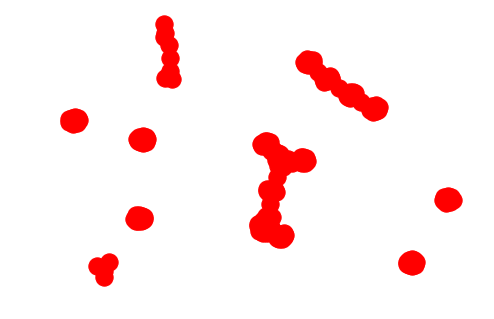

In [67]:
nx.draw(F)

/home/miriam/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


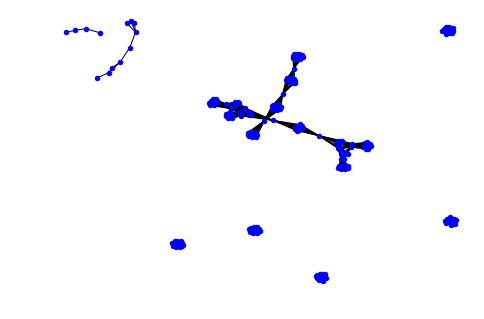

In [72]:
nx.draw(F, node_size=20, node_color='blue')